# Project: Investigate the Londing Housing Dataset

## Table of contents

* [Introduction](#Introduction)
* [Data Wrangling](#Data_Wrangling)
* [Exploratory Data Analysis](#Exploratory_Data_Analysis)
* [Conclusions](#Conclusion)

## Introduction

## About London housing dataset

This data set contains 13000+ wich is centered around london housing market, it contains alot of additional relevant data related to Averge housing prices , number of houses sold , number of crimes committed

<img src="image1_1Smpxfn.jpg" width="600" height="400" align="center"/>

### Based on the dataset, we will work on answering the following Questions:

* How many records are there where the crimes are zero in England?
* What is the Minimum Average price per year in England?
* What is the Maximum Average price per year in England?
* What are the Most 5 areas that has high number of crimes?
* What is the Relationship between the Average Price and the number of houses sold ?
* What is the Most year that had crime cases?
* What is the Least year that had crime cases?
* How many houses were sold in every area?
* What the is the Top Five areas that sold houses along the years?
* What the is the Least Five areas that sold houses along the years?

In [1]:
# Import required packages

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
# load data

df=pd.read_csv('5. London Housing Data.csv')

## Data_Wrangling

In [87]:
# Exploring Data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           13549 non-null  object 
 1   area           13549 non-null  object 
 2   average_price  13549 non-null  int64  
 3   code           13549 non-null  object 
 4   houses_sold    13455 non-null  float64
 5   no_of_crimes   7439 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 635.2+ KB


In [88]:
df.head()

,date,area,average_price,code,houses_sold,no_of_crimes
0,1/1/1995,city of london,91449,E09000001,17.0,NaN
1,2/1/1995,city of london,82203,E09000001,7.0,NaN
2,3/1/1995,city of london,79121,E09000001,14.0,NaN
3,4/1/1995,city of london,77101,E09000001,7.0,NaN
4,5/1/1995,city of london,84409,E09000001,10.0,NaN


In [89]:
# Check for duplicates

df.duplicated().all()

False

In [90]:
# checking for null values

df.isnull().sum()

date                0
area                0
average_price       0
code                0
houses_sold        94
no_of_crimes     6110
dtype: int64

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           13549 non-null  object 
 1   area           13549 non-null  object 
 2   average_price  13549 non-null  int64  
 3   code           13549 non-null  object 
 4   houses_sold    13455 non-null  float64
 5   no_of_crimes   7439 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 635.2+ KB


### Observations

1. data contains 13549 and 7 columns
2. column dta types vary among ints,floats,objects
3. There are some null values in the dataset
4. There are no duplicated rows in the dataset
5. Date column in is object data type

### Data Cleaning

**First**,since we have null values in importnant rows which we cant remove we wil exchange the null with 0 values.

In [85]:
#filling null values

df['houses_sold']=df['houses_sold'].fillna(0)
df['no_of_crimes']=df['no_of_crimes'].fillna(0)

**Second**,changing date column data type into Datetime instead of string type

In [92]:
# changing date column data type into Datetime instead of string type

df['date']=pd.to_datetime(df['date'])

**Third**,adding a year column with year only value

In [93]:
# Adding a year column with year only value

df['Year']=df['date'].dt.year

In [9]:
# checking for final result

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           13549 non-null  datetime64[ns]
 1   area           13549 non-null  object        
 2   average_price  13549 non-null  int64         
 3   code           13549 non-null  object        
 4   houses_sold    13549 non-null  float64       
 5   no_of_crimes   13549 non-null  float64       
 6   Year           13549 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 741.1+ KB


## Exploratory_Data_Analysis

<img src="istockphoto-1186618062-612x612.jpg" width="700" height="400" align="center"/>

In [10]:
df.describe()

,average_price,houses_sold,no_of_crimes,Year
count,1.354900e+04,13549.000000,13549.000000,13549.000000
mean,2.635197e+05,3866.978449,1185.030703,2007.040224
std,1.876175e+05,12076.629035,1265.015897,7.239151
min,4.072200e+04,0.000000,0.000000,1995.000000
25%,1.323800e+05,244.000000,0.000000,2001.000000
50%,2.229190e+05,369.000000,1085.000000,2007.000000
75%,3.368430e+05,3073.000000,2210.000000,2013.000000
max,1.463378e+06,132163.000000,7461.000000,2020.000000


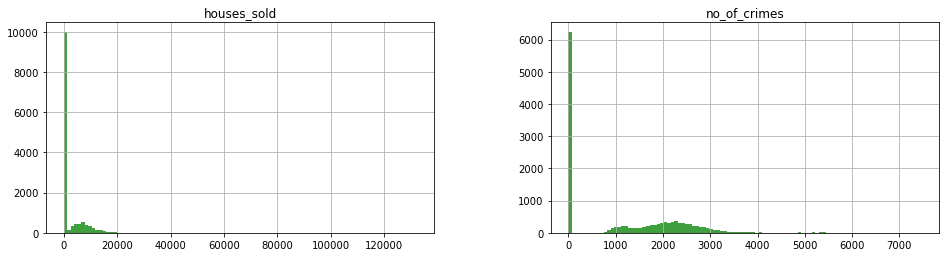

In [76]:
#plotting a histogram to check the distribution of data and how it frequents along the dataset
df.hist(['houses_sold','no_of_crimes'],figsize=(16,24),layout=(5,2),alpha=0.75,facecolor='g',bins=100);

* The No. of crimes that happened in different areas freqeunts mostly around 0 crimes the most and very low frequents varies from 1000 to 3000

* The number of houses sold frequents mostly at 0 with the highest frequency and it increases to 20000 with low frequencies

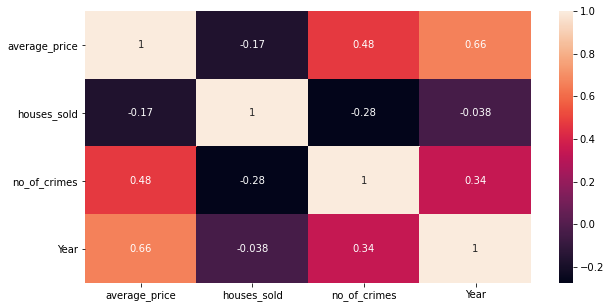

In [83]:
# plotting a heatmap to check for correlatons between variables

plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

## Observations

* There is a moderate correlation between average price and year which indicates the increase of prices slightly when along the years.
* There is also a moderate correlation between no. of crimes and years which indicates an increase in the no. of crimes
along the years.


### Q1.How many records are there where the crimes are zero in England?

In [11]:
df[(df['no_of_crimes']==0) & (df['area']=='england')]

,date,area,average_price,code,houses_sold,no_of_crimes,Year
13248,1995-01-01,england,53203,E92000001,47639.0,0.0,1995
13249,1995-02-01,england,53096,E92000001,47880.0,0.0,1995
13250,1995-03-01,england,53201,E92000001,67025.0,0.0,1995
13251,1995-04-01,england,53591,E92000001,56925.0,0.0,1995
13252,1995-05-01,england,53678,E92000001,64192.0,0.0,1995
...,...,...,...,...,...,...,...
13544,2019-09-01,england,249942,E92000001,64605.0,0.0,2019
13545,2019-10-01,england,249376,E92000001,68677.0,0.0,2019
13546,2019-11-01,england,248515,E92000001,67814.0,0.0,2019
13547,2019-12-01,england,250410,E92000001,0.0,0.0,2019


#### There are 301 Records with zero crimes in England

### Q2.What is the Minimum Average price per year in England?

In [12]:
df[(df['average_price']) & (df['area']=='england')].sort_values('average_price',ascending=True).head(1)

,date,area,average_price,code,houses_sold,no_of_crimes,Year
13260,1996-01-01,england,52333,E92000001,48694.0,0.0,1996


 #### Minimum average in England per year is 52,333

### Q3.What is the Maximum Average price per year in England?

In [13]:
df[(df['average_price']) & (df['area']=='england')].sort_values('average_price',ascending=False).head(1)

,date,area,average_price,code,houses_sold,no_of_crimes,Year
13546,2019-11-01,england,248515,E92000001,67814.0,0.0,2019


#### Maximum Average price for sld houses per year in England is 248,515

### Q4.What are the Most 5 areas that has high number of crimes?

In [14]:
max_crimes=df.groupby('area')['no_of_crimes'].max().head(5)
max_crimes

area
barking and dagenham    2049.0
barnet                  2893.0
bexley                  1914.0
brent                   2937.0
bromley                 2637.0
Name: no_of_crimes, dtype: float64

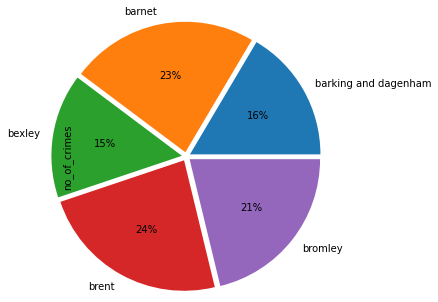

In [15]:
max_crimes.plot.pie(autopct='%0.f%%',explode=[0.05,0.05,0.05,0.05,0.05],radius=1.5)

### Q5.What is the Relationship between the Average Price and the number of houses sold ?

Now i will calculate the pearson correlation coefficient which represents the Type of relationship 
between these variables

In [103]:
# pearson correlation coefficient

df[['average_price', 'houses_sold']].corr()

,average_price,houses_sold
average_price,1.000000,-0.168256
houses_sold,-0.168256,1.000000


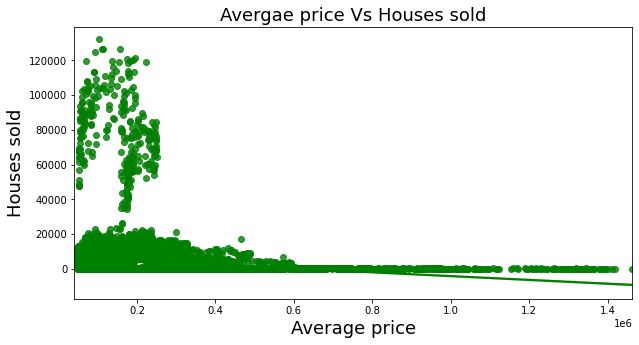

In [105]:
plt.figure(figsize=(10,5));
sns.regplot(x='average_price',y='houses_sold',data=df,color='g');
plt.title('Avergae price Vs Houses sold',fontsize=18);
plt.xlabel('Average price',fontsize=18);
plt.ylabel('Houses sold',fontsize=18);

#### We can interpret from the Visual and pearson correlation of -0.17 that there is a -ve relationship between them , which means Average price has nothing to do with the number of houses sold.

### Q6.What is the Relationship between the Year and the number of Crimes commited sold ?

If i want to check the correlation between Year progress and the number of crimes committed then aggregate the 2 columns and put it in a Dataframe and find the correlation between them

In [101]:
## Creating an aggreagated data frame of year and number of crimes

crimes_per_year=df.groupby('Year')['no_of_crimes'].sum()
crimes_per_year=pd.DataFrame(crimes_per_year)
crimes_per_year.reset_index(inplace=True)
crimes_per_year.head(5)

,Year,no_of_crimes
0,1995,0.0
1,1996,0.0
2,1997,0.0
3,1998,0.0
4,1999,0.0


In [22]:
crimes_per_year[['Year', 'no_of_crimes']].corr()

,Year,no_of_crimes
Year,1.000000,0.484081
no_of_crimes,0.484081,1.000000


C:\Users\Aellawah\anaconda3\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x360 with 0 Axes>

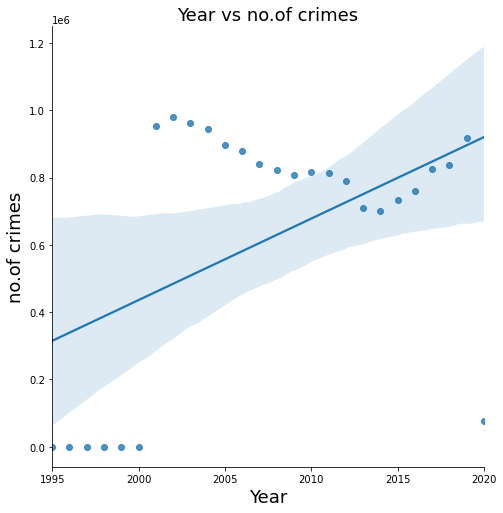

In [102]:
plt.figure(figsize=(10,5));
sns.lmplot(x='Year',y='no_of_crimes',data=crimes_per_year,size=7);
plt.title('Year vs no.of crimes',fontsize=18);
plt.xlabel('Year',fontsize=18);
plt.ylabel('no.of crimes',fontsize=18);

#### We can interpret from the Visual after aggregating each unique year with its corresponding total sum of no. of crimes and calculating their pearson correlation coefficient wich represents the Strength of the relationhsip between them which was 0.48 which indicates a moderate relationship between them , which means there is a positive modeate relationship between no. of crimes and the advancement of the years.

### Q7.What is the most year that had crime cases?

In [117]:
df.groupby('Year')['no_of_crimes'].count().sort_values(ascending=False).head(1)

Year
2007    396
Name: no_of_crimes, dtype: int64

#### Most year that had crimes is 1996 with total of 542 Crimes

### Q8.What is the Least year that had crime cases?

In [114]:
df.groupby('Year')['no_of_crimes'].count().sort_values(ascending=True).head(1)

Year
1995    0
Name: no_of_crimes, dtype: int64

#### Least year that had crimes is 2020 with total of 45 Crimes

### Q9.What the is the Top Five areas that sold houses along the years?

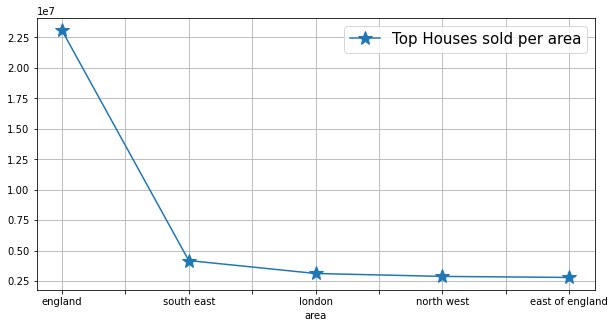

In [124]:
Top_5_areas.plot.line(figsize=(10,5),marker='*',markersize=15,label='Top Houses sold per area')
plt.grid();
plt.legend(fontsize=15);

Top Five areas that sold houses:

  A-england            
  B-south east         
  C-london              
  D-north west          
  E-east of england    

###  Q10.What the is the Least Five areas that sold houses along the years?

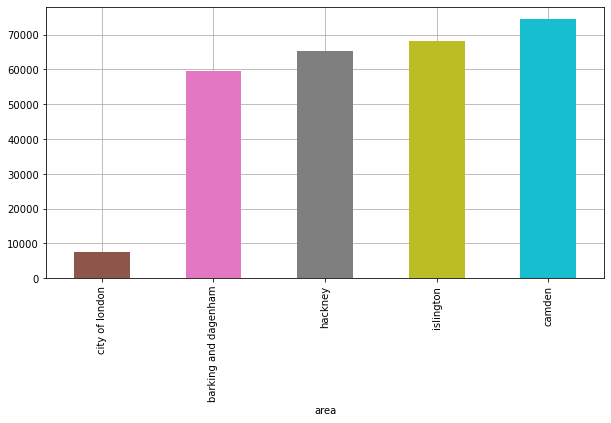

In [127]:
b=df.groupby(['area'])['houses_sold'].sum().sort_values(ascending=True).head(5)
colors=['#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
plt.figure(figsize=(10,5))
Least_5_areas.plot.bar(color=colors,zorder=3)
plt.grid(zorder=0)

Least Five areas that sold houses:

A-city of london          
B-barking and dagenham    
C-hackney                 
D-islington               
E-camden      

## Conclusion

* The No. of crimes that happened in different areas freqeunts mostly around 0 crimes the most and very low frequents varies from 1000 to 3000
* The number of houses sold frequents mostly at 0 with the highest frequency and it increases to 20000 with low frequencies
* There is a moderate correlation between average price and year which indicates the increase of prices slightly when along the years.
* There is also a moderate correlation between no. of crimes and years which indicates an increase in the no. of crimes
along the years.
* There are 301 Records with zero crimes in England.
* Minimum average price for a utility in England per year is 52,333.
* Maximum Average price for a utility in England per year is 248,515.
* Top 5 areas with hight crimes numbers are barking and dagenham with 2049.0 crimes,barnet with 2893.0 crimes,bexley           with 1914.0 crimes,brent with 2937.0 crimes and bromley with 2637.0 crimes.
* Most year that had crimes is 1996 with total of 542 Crimes.
* Least year that had crimes is 2020 with total of 45 Crimes.
* Top five areas with highest sum of houses sold are england with 23077637 ,south east with 4195116,london with 3134378,north west with 2895280 and east of england with 2809800.0.
* Top five areas with lowest sum of houses sold are city of london with 7586,barking and dagenham with 59498,hackney           with 65356,islington= with 68271,camden with 74362.
* We can interpret from the Visual and pearson correlation of -0.17 that there is a -ve relationship between them , which means Average price has nothing to do with the number of houses sold
* We can interpret from the Visual after aggregating each unique year with its corresponding total sum of no. of crimes and calculating their pearson correlation coefficient wich represents the Strength of the relationhsip between them which was 0.48 which indicates a +ve relationship between them , which means there is a positive relationship between no. of crimes and the advancement of the years.